# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Nov 14 08:12:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


2.1.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
Image classification (classifying tumors)
Self driving cars
Classifying people (crimials, spy cams)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
Overfitting is when a model is performing well on the training data but it did not learn to generalize on the test data, thus the model learned noise and no signal

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [6]:
Many ways of preventing overfitting.
0) The most important being regularization
1) You must have a validation set where you test whether the model learned signal or noise.
2) dropout layers, batch_norm
3) Not being too complex
4) We have a bias variance tradeoff. Bias is the thing the model cannot learn since it is not complex enough, and variance is if the model has high complexity and can thus easily learn noise.
A model should be a good inbetween
e.g. linReg has low complexity --> low var, but high bias.
deep nn is the other way around

SyntaxError: ignored

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# zero padding improves perfromance --> we preserve input size
# smaller kernals generally peform better since we can extract more features, however, depends on the data
# smaller strides work the same way. The smaller the step, the more featues we learn

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [8]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [10]:
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 107015436.84it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 114711831.27it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26686930.67it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24175797.93it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [13]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [17]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}")
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [19]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [20]:
import matplotlib.pyplot as plt

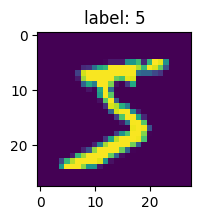

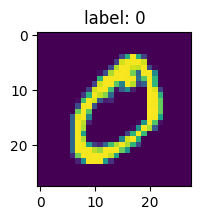

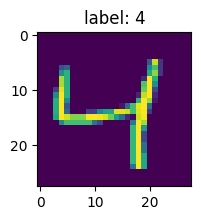

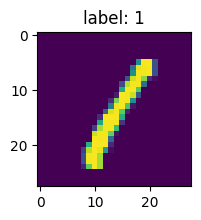

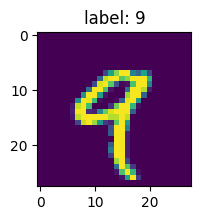

In [23]:
for i in range(5):
  img, label = train_data[i][0].squeeze(), train_data[i][1]
  plt.figure(figsize=(2,2))
  plt.title(f"label: {label}")
  plt.imshow(img)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [24]:
from torch.utils.data import DataLoader

In [25]:
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [26]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7efa64c160b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7efa64c14e80>)

In [27]:
for sample in next(iter(train_data_loader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [28]:
from torch import nn
class MNIST_model(torch.nn.Module):
  """Model capable of predicting on MNIST dataset.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [30]:
model = MNIST_model(input_shape=1, hidden_units=10, output_shape=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
model(dummy_x)

tensor([[ 0.0256,  0.0280, -0.0514,  0.0346,  0.0309,  0.0330,  0.0175,  0.0111,
         -0.0553, -0.0341]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [35]:
%%time
from tqdm.auto import tqdm

#CPU model
cpu_model = MNIST_model(input_shape=1, hidden_units=10, output_shape=10).to("cpu")
#Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cpu_model.parameters(), lr=0.1)
#Training
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_data_loader):
    # set into train mode
    cpu_model.train()
    #set data to cpu
    X, y = X.to("cpu"), y.to("cpu")
    #forward pass
    y_pred = cpu_model(X)
    #loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    #zero gradients
    optimizer.zero_grad()
    #backprop
    loss.backward()
    # step
    optimizer.step()

  #adjust the loss
  train_loss /= len(train_data_loader)
  #test loss
  test_loss = 0
  #eval mode
  cpu_model.eval()
  with torch.inference_mode():
    for batch, (X_t, y_t) in enumerate(test_data_loader):
      #set data to cpu
      X_t, y_t = X_t.to("cpu"), y_t.to("cpu")
      #forward pass
      y_test_pred = cpu_model(X_t)
      t_loss = loss_fn(y_test_pred, y_t)
      test_loss += t_loss
    #adjust loss
    test_loss /= len(test_data_loader)
  #print out whats happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.275 | Test loss: 0.060
Epoch: 1 | Loss: 0.073 | Test loss: 0.057
Epoch: 2 | Loss: 0.055 | Test loss: 0.051
Epoch: 3 | Loss: 0.048 | Test loss: 0.047
Epoch: 4 | Loss: 0.040 | Test loss: 0.036
CPU times: user 3min 45s, sys: 1.46 s, total: 3min 47s
Wall time: 3min 58s


In [ ]:
# It took 4 minutes for 5 epochs on the CPU!

In [36]:
%%time
from tqdm.auto import tqdm

#GPU MODEL!
gpu_model = MNIST_model(input_shape=1, hidden_units=10, output_shape=10).to(device)
#Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(gpu_model.parameters(), lr=0.1)
#Training
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_data_loader):
    # set into train mode
    gpu_model.train()
    #set data to cpu
    X, y = X.to(device), y.to(device)
    #forward pass
    y_pred = gpu_model(X)
    #loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    #zero gradients
    optimizer.zero_grad()
    #backprop
    loss.backward()
    # step
    optimizer.step()

  #adjust the loss
  train_loss /= len(train_data_loader)
  #test loss
  test_loss = 0
  #eval mode
  cpu_model.eval()
  with torch.inference_mode():
    for batch, (X_t, y_t) in enumerate(test_data_loader):
      #set data to cpu
      X_t, y_t = X_t.to(device), y_t.to(device)
      #forward pass
      y_test_pred = gpu_model(X_t)
      t_loss = loss_fn(y_test_pred, y_t)
      test_loss += t_loss
    #adjust loss
    test_loss /= len(test_data_loader)
  #print out whats happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.432 | Test loss: 0.089
Epoch: 1 | Loss: 0.078 | Test loss: 0.064
Epoch: 2 | Loss: 0.061 | Test loss: 0.044
Epoch: 3 | Loss: 0.052 | Test loss: 0.048
Epoch: 4 | Loss: 0.046 | Test loss: 0.060
CPU times: user 58.5 s, sys: 648 ms, total: 59.2 s
Wall time: 1min 2s


In [ ]:
# Only 1 minute on GPU, noice!

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

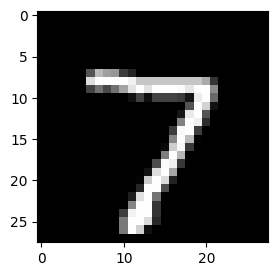

In [38]:
plt.figure(figsize=(3,3))
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [43]:
#shows how to label a single item!
logit = gpu_model(test_data[0][0].unsqueeze(dim=0).to(device))
probs = torch.softmax(logit, dim=1)
label = torch.argmax(probs, dim=1).item()
label

7

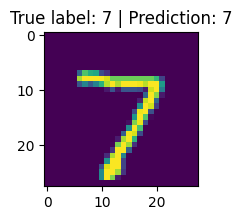

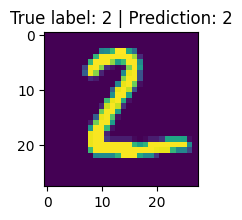

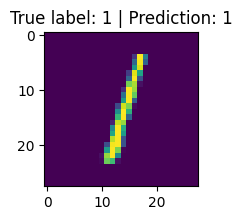

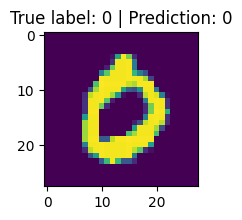

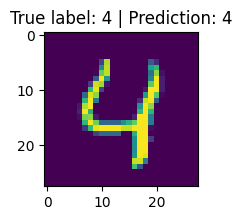

In [45]:
for i in range(5):
  img, label = test_data[i][0], test_data[i][1]
  logits = gpu_model(img.unsqueeze(dim=0).to(device))
  probs = torch.softmax(logits, dim=1)
  label = torch.argmax(probs, dim=1).item()
  plt.figure(figsize=(2,2))
  plt.title(f"True label: {label} | Prediction: {label}")
  plt.imshow(img.squeeze())

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?